# Obliczenia naukowe, lista 4

## Dominika Szydło, 250109

### Zadanie 1
Napisać funkcję obliczającą ilorazy różnicowe.

In [3]:
function ilorazyRoznicowe(x::Vector{Float64}, f::Vector{Float64})
    #funkcja liczy ilorazy różnicowe wielomianu interpolującego funkcję w punktach x
    #Dane:
    #    x: wektor o długości n+1 zawierający węzły x_1, x_2,..., x_{n+1}
    #    f: wektor o długości n+1 zawierający wartości interpolowanej funkcji f(x_i) dla x_i z wektora x
    #
    #Wywołanie: ilorazyRoznicowe([3.0, 1.0, 5.0, 6.0], [1.0, -3.0, 2.0, 4.0])
    #
    #Wynik:
    #   fx: wektor o długości n+1 zawierające obliczone ilorazy różnicowe
    
    n = length(x)
    fx = copy(f)
    
    for i in 2:n
        for j in n:-1:i
            fx[j] = (fx[j]-fx[j-1])/(x[j]-x[j-i+1])
        end
    end
    
    return fx
end

ilorazyRoznicowe (generic function with 1 method)

**Opis algorytmu**

Aby obliczyć ilorazy różnicowe należy skorzystać z faktu, iż $f[x_i] = f(x_i)$ oraz ze wzoru $f[x_i, x_{i+1}, ...,x_{i+j}] = \frac{f[x_{i+1}, x_{i+2}, ..., x_{i+j}]-f[x_i, x_{i+1}, ..., x_{i+j-1}]}{x_{i+j}-x_i}$. Na początku za `fx` przyjmujemy kopię wektora `f`, a następnie w podwójnej pętli obliczamy kolejne ilorazy różnicowe. Oznaczmy $f[x_i, x_{i+1}, ..., x_{i+j}]$ przez $f_{i, i+j}$ - wtedy po jednym obiegu wewnętrznej pętli każda z modyfikowanych wartości wektora `fx` zmienia się z $f_{j-i+2, j}$ na $f_{j-i+1, j}$. Dzięki temu, że wartości są aktualizowane od końca wektora, dostępne są informacje do obliczenia kolejnych ilorazów różnicowych, co robimy aż do momentu, gdy wszystkie wartości wektora `fx` będą miały postać $f_{1, k}$, dla $k = 1, 2, ..., n+1$. 

### Zadanie 2
Napisać funkcję obliczającą wartość wielomianu interpolacyjnego stopnia $n$ w postaci Newtona $N_n(x)$ w punkcie $x=t$ za pomocą uogólnionego algorytmu Hornera, w czasie $O(n)$

In [4]:
function warNewton(x::Vector{Float64}, fx::Vector{Float64}, t::Float64)
    #funkcja liczy wartość wielomianu interpolacyjnego w punkcie t za pomocą uogólnionego algorytmu Hornera
    #Dane:
    #    x: wektor o długości n+1 zawierający węzły x_0, x_1,..., x_n
    #   fx: wektor długości n+1 zawierający ilorazy różnicowe
    #    t: punkt, w którym należy obliczyć wartość wielomianu
    #
    #Wywołanie: warNewton([3.0, 1.0, 5.0, 6.0], [1.0, 2.0, -3/8, 7/40], 4.0)
    #
    #Wynik:
    #   nt: wartość wielomianu w punkcie t
    
    n = length(x)
    nt = fx[n]
    
    for i in n-1:-1:1
        nt = fx[i] + (t-x[i]) * nt
    end

    return nt
end

warNewton (generic function with 1 method)

**Opis algorytmu**

Wartość wielomianu interpolacyjnego w punkcie $t$ jest obliczana za pomocą uogólnionego algorytmu Hornera, tj.:

$w_n(x) := f[x_0, x_1, \ldots, x_n]$

$w_k(x) := f[x_0, x_1, \ldots, x_k] + (x-x_k)w_{k+1}(x)$ dla $k = n-1, \ldots, 0$

$N_n(x) := w_0(x)$

Na początku pod zmienną `nt` wstawiamy $f[x_0, \ldots, x_n]$, a następnie w pętli wykonujemy krok drugi algorytmu, gdzie $x_k$ to kolejne węzły interpolacyjne, a za $x$ wstawiamy $t$. Po wyjściu z pętli zmienna `nt` będzie miała wartość $w_0(t)$, czyli wartość wielomianu interpolacyjnego w punkcie $t$. 

### Zadanie 3 

Znając współczynniki wielomianu interpolacyjnego w postaci Newtona $c_0 = f[x_0], c_1 = f[x_0, x_1], c2 = f[x_0, x_1, x_2], ..., c_n = f[x_0, ..., x_n]$ (ilorazy różnicowe) oraz węzły $x_0, x_1, ..., x_n$ napisać funkcję obliczającą, w czasie $O(n^2)$, współczynniki jego postaci naturalnej $a_0, ..., a_n$ tzn. $a_nx^n+a_{n−1}x^{n−1}+...+a_1x+a_0$.

In [5]:
function naturalna(x::Vector{Float64}, fx::Vector{Float64})
    #funkcja liczy współczynniki postaci naturalnej interpolowanego wielomianu na podstawie węzłów i ilorazów
    #różnicowych
    #Dane:
    #    x: wektor długości n+1 zawierający węzły x_0, x_1,..., x_n
    #   fx: wektor długości n+1 zawierający ilorazy różnicowe
    #
    #Wywołanie: naturalna([3.0, 1.0, 5.0, 6.0], [1.0, 2.0, -3/8, 7/40])
    #
    #Wynik:
    #   a: wektor długości n+1 zawierający obliczone współczynniki postaci naturalnej
    
    n = length(x)
    a = vec(zeros(Float64, 1, n))
    a[n] = fx[n]

    for i in n-1:-1:1
        a[i] = fx[i] - a[i+1]*x[i]
        for j in i+1:n-1
            a[j] -= a[j+1]*x[i]
        end
    end

    return a
end

naturalna (generic function with 1 method)

**Opis algorytmu**

Aby obliczyć współczynniki postaci naturalnej wielomianu interpolacyjnego w postaci Newtona należy skorzystać z uogólnionego schematu Hornera, który był stosowany również w poprzednim zadaniu, a także z faktu, iż $c_n = a_n$. W pętli wyliczane są współczynniki postaci naturalnej wielomianów pośrednich $w_k(x)$, na podstawie których można wyliczyć finalne współczynniki $a_n, a_{n-1}, \ldots, a_0$. Algorytm działa w czasie $O(n^2)$, ponieważ zewnętrzna pętla wykonuje się $n$ razy, wewnętrzna natomiast conajwyżej $n$, zatem całość jest rzędu $O(n^2)$

### Zadanie 4

Napisać funkcję, która zinterpoluje zadaną funkcję $f(x)$ w przedziale $[a, b]$ za pomocą wielomianu interpolacyjnego stopnia $n$ w postaci Newtona. Następnie narysuje wielomian interpolacyjny i interpolowaną funkcję.

In [6]:
using Plots

function rysujNnfx(f,a::Float64,b::Float64,n::Int)
    #Dane:
    #    f: funkcja f(x) zadana jako anonimowa funkcja
    #  a,b: przedział interpolacji
    #    n: stopień wielomianu interpolacyjnego
    #
    #Wywołanie: rysujNnfx(x->x^3-x^2+5, -1.0, 1.0, 8)
    #
    #Wynik:
    #    -: funkcja rysuje wielomian interpolacyjny i interpolowaną funkcję w przedziale [a, b]
    
    x = vec(zeros(Float64, 1, n+1))
    helper = a
    h = (b-a)/n
    for i in 1:n+1
        x[i] = helper
        helper += h
    end
    
    
    y = vec(zeros(Float64, 1, n+1))
    for i in 1:n+1
        y[i] = f(x[i])
    end
    
    fx = ilorazyRoznicowe(x, y)
    
    x_plot = []
    f_plot = []
    w_plot = []
    h = (b-a)/(20*n)
    helper = a
    for i in 1:20*n+1
        append!(x_plot, helper)
        append!(f_plot, f(helper))
        append!(w_plot, warNewton(x, fx, helper))
        helper += h
    end
    
    plot(x_plot, f_plot, label="f(x)")
    plot!(x_plot, w_plot, label = "w(x)")
    
end

rysujNnfx (generic function with 1 method)

**Opis algorytmu**

Na początku obliczany jest wektor `x`, który przechowuje węzły interpolacyjne, oddalone od siebie o odległość $\frac{b-a}{n}$. Następnie obliczony zostaje wektor `y`, przechowujący wartości funkcji $f$ w punktach z wektora `x`. Za pomocą funkcji `ilorazyRoznicowe` obliczone także zostają ilorazy różnicowe. Do wykresów powstaje kolejny wektor z argumentami (`x_plot`), tym razem jednak jest ich $20*n+1$, ale również są od siebie równomiernie oddalone. Dla każdego z nich zostaje obliczona wartość funkcji $f$ oraz wartość wielomianu interpolacyjnego, obliczana za pomocą funkcji `warNewton`. Wartości te są zapisywane odpowiednio do wektorów `f_plot` i `w_plot`. Na końcu rysowany jest wykres, gdzie argumentami są liczby z wektora `x_plot`, a seriami danych liczby z wektorów `f_plot` (seria $f(x)$) oraz `w_plot` (seria $w(x)$).

**Okienko testowe**

[1.0, 2.0, -0.375, 0.17500000000000002]
1.3499999999999999
[-8.75, 7.525, -1.95, 0.175]


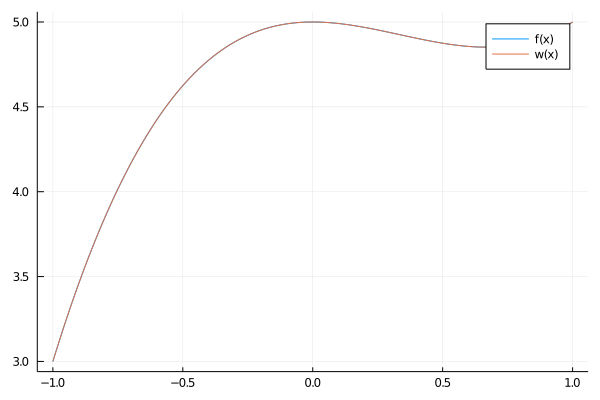

In [7]:
x = [3.0, 1.0, 5.0, 6.0]
f = [1.0, -3.0, 2.0, 4.0]
fx = [1.0, 2.0, -3/8, 7/40]
t = 4.0
g = x->x^3-x^2+5
a = -1.0
b = 1.0
n = 8
println(ilorazyRoznicowe(x, f))
println(warNewton(x, fx, t))
println(naturalna(x, fx))
rysujNnfx(g, a, b, n)

### Zadanie 5

Przetestować funkcję `rysujNnfx(f,a,b,n)` na następujących przykładach:

**a)** $e^x$, $[0,1]$, $n= 5,10,15$

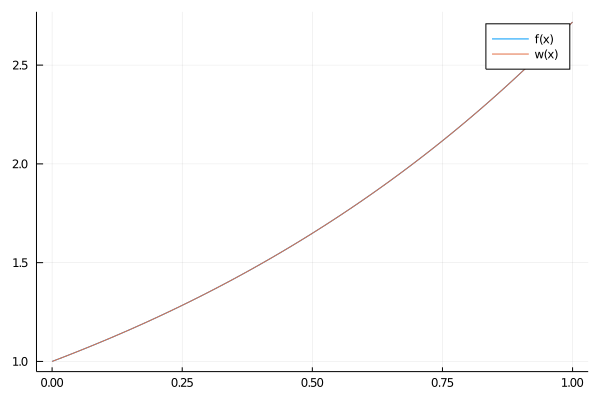

In [8]:
rysujNnfx(x->ℯ^x, 0.0, 1.0, 5)

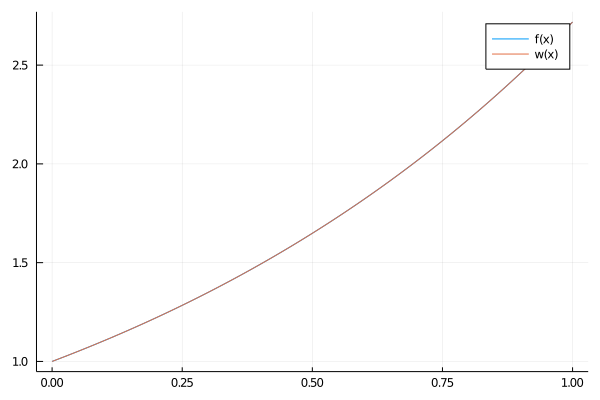

In [9]:
rysujNnfx(x->ℯ^x, 0.0, 1.0, 10)

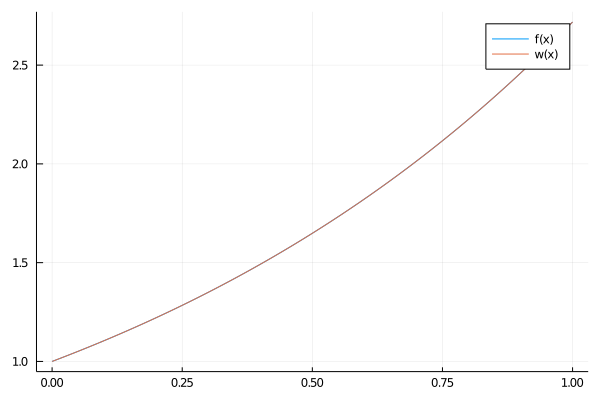

In [10]:
rysujNnfx(x->ℯ^x, 0.0, 1.0, 15)

**b)** $x^2sinx$, $[-1, 1]$, $n=5,10,15$

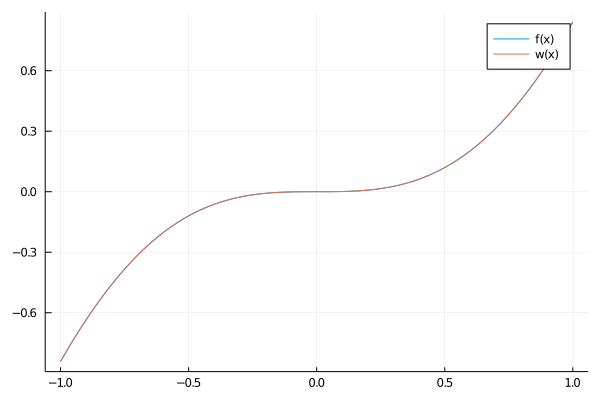

In [11]:
rysujNnfx(x->x^2*sin(x), -1.0, 1.0, 5)

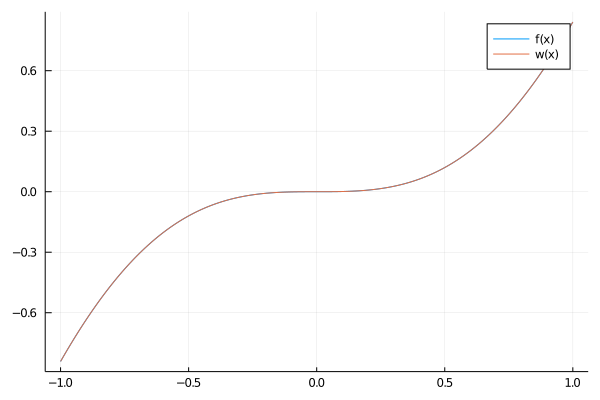

In [12]:
rysujNnfx(x->x^2*sin(x), -1.0, 1.0, 10)

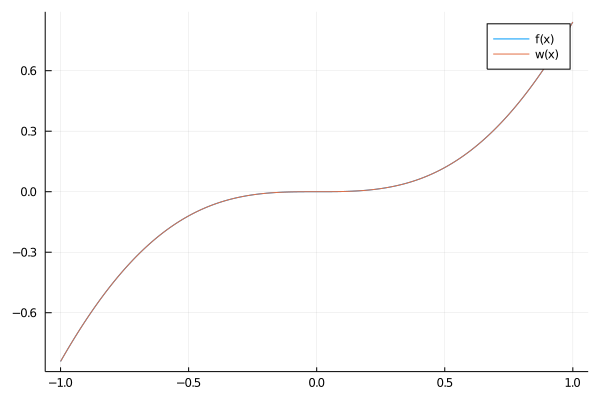

In [13]:
rysujNnfx(x->x^2*sin(x), -1.0, 1.0, 15)

Interpolacja dała dobre przybliżenie obydwu funkcji, wykres wielomianu praktycznie pokrywa się z faktycznym wykresem funkcji, nawet dla najmniejszych wartości $n$. Dzieje się tak, ponieważ węzły są równomiernie rozmieszczone, dzięki czemu obraz funkcji, jaki oddają jej wartości w węzłach jest ogólny i nie skupia się na jakimś fragmencie przedziału $[a, b]$, kosztem informacji o innym.

### Zadanie 6

Przetestować funkcję `rysujNnfx(f,a,b,n)` na następujących przykładach (zjawisko rozbieżności):

**a)** $|x|$, $[-1, 1]$, $n = 5, 10, 15$

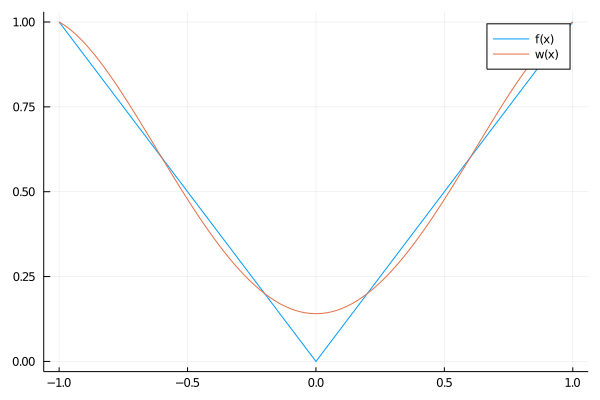

In [14]:
rysujNnfx(x->abs(x), -1.0, 1.0, 5)

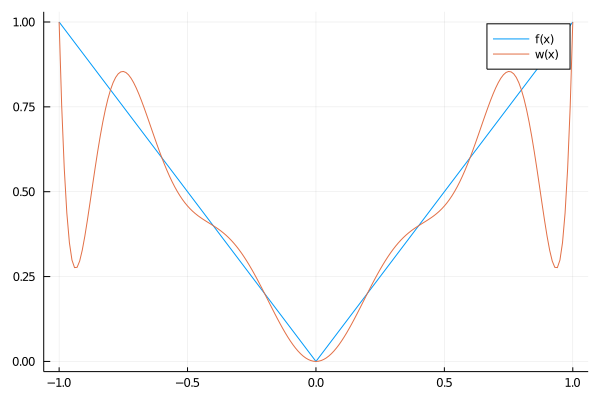

In [15]:
rysujNnfx(x->abs(x), -1.0, 1.0, 10)

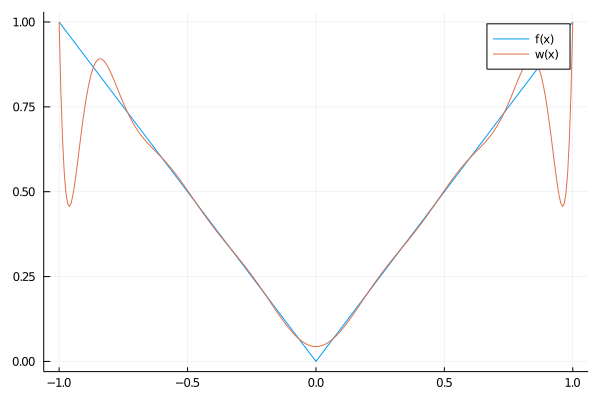

In [16]:
rysujNnfx(x->abs(x), -1.0, 1.0, 15)

**b)** $\frac{1}{1+x^2}$, $[-5, 5]$, $n = 5, 10, 15$

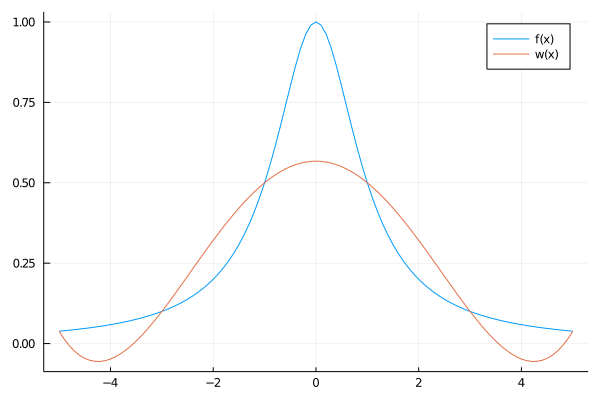

In [17]:
rysujNnfx(x->1/(1+x^2), -5.0, 5.0, 5)

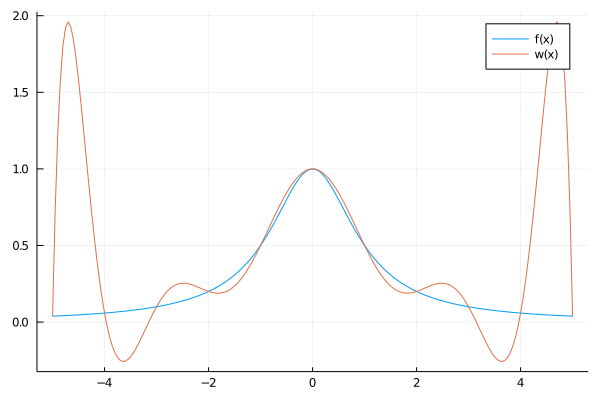

In [18]:
rysujNnfx(x->1/(1+x^2), -5.0, 5.0, 10)

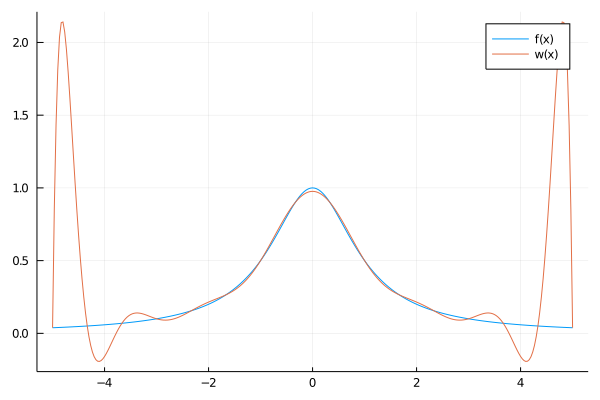

In [19]:
rysujNnfx(x->1/(1+x^2), -5.0, 5.0, 15)

Dla obydwu funkcji można zaobserowować, iż wraz ze wzrostem stopnia wielomianu interpolacyjnego przybliżenie polepsza się na środku przedziału, ale pogarsza się na jego końcach. W przypadku funkcji $f(x) = |x|$ jest to spowodowane faktem, że nie jest ona różniczkowalna, natomiast w przypadku funkcji $f(x) = \frac{1}{1+x^2}$ mamy do czynienia ze zjawiskiem Runge'go. Polega ono na tym, że paradoksalnie po zwiększeniu liczby węzłów otrzymujemy gorsze przybliżenie funkcji i dotyczy ono zazwyczaj węzłów równomiernie rozmieszczonych, czyli takich, jakie tworzone są w funkcji z zadania 4. Na szczęście jest sposób, by tego zjawiska uniknąć - rozmieszczenie węzłów gęściej na końcach przedziału $[a, b]$. Można np. użyć $n$ węzłów Czebyszewa, które są miejscami zerowymi wielomianu Czebyszewa $n$-tego stopnia.